In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, LassoLars, LassoLarsCV, Lasso, ElasticNet, ElasticNetCV, BayesianRidge
from keras.models import Sequential
from keras.layers import Dense
from keras.constraints import max_norm
%matplotlib inline

np.random.seed(13)

from collections import Counter

/Users/hurlink/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [4]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


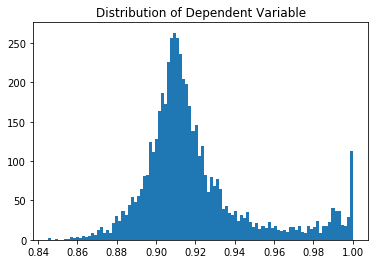

In [5]:
# Explore distribution of target
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [6]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [7]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [8]:
# Remove first column to make predictions
X_test = test.iloc[:, 1:]
X_test.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Option 1: remove features that add no value
def remove_single_feature(X_train, X_test):
    cols = X_train.columns
    single_val = []
    for index in cols:
        if (len(X_train[index].unique()) == 1):
            single_val.append(index)

    test_val = []
    for index in single_val:
        if (len(X_test[index].unique()) == 1):
            test_val.append(index)
            
    single_feature = list(set(single_val).intersection(set(test_val)))
    
    X_single_train = X_train.drop(columns=single_feature)
    X_single_test = X_test.drop(columns=single_feature)

    return X_single_train, X_single_test, single_feature

# Extension on option 1: log small values of features
def log_small(X_train, X_test):
    X_single_train, X_single_test, single_feature = remove_single_feature(X_train, X_test)
    
    small_cols = []
    for i in X_single_train.columns:
        count = sum(X_single_train[i] < 0.1)
        if count > .9*5331:
            small_cols.append(i)

    log_columns = list(set(small_cols).difference(set(single_feature)))

    epsilon_X_train = X_single_train.replace(0, 10 ** (-100))
    epsilon_X_test = X_single_test.replace(0, 10 ** (-100))
    for col in log_columns:
        epsilon_X_train[col] = epsilon_X_train[col].apply(np.log)
        epsilon_X_test[col] = epsilon_X_test[col].apply(np.log)
    return epsilon_X_train, epsilon_X_test

In [ ]:
X_train_scale_pca, X_test_scale_pca = scale_and_pca(X_train, X_test)
pd.DataFrame(X_train_scale_pca)

In [ ]:
# Option 2: PCA
def scale_and_pca(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train.values)
    X_train_scale = scaler.transform(X_train.values)
    X_test_scale = scaler.transform(X_test.values)
    
    pca = PCA(0.99)
    
    pca.fit(X_train_scale)
    
    X_train_scale_pca = pca.transform(X_train_scale)
    X_test_scale_pca = pca.transform(X_test_scale)
    
    return X_train_scale_pca, X_test_scale_pca

In [ ]:
# Option 3: Remove highly correlated features
def remove_high_correlation(X_train, X_test):
    corr_matrix = X_train.corr().abs()
    high_corr_var=np.where(corr_matrix>0.999)
    high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
    
    remove_vars = [i[0] for i in high_corr_var]
    print(remove_vars)
    
    X_corr_train = X_train.drop(columns=remove_vars)
    X_corr_test = X_test.drop(columns=remove_vars)
    return X_corr_train, X_corr_test

In [ ]:
X_single_train, X_single_test, single_feature = remove_single_feature(X_train, X_test)

In [ ]:
# Random Search for best parameters
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMRegressor(objective='regression',
                                  learning_rate = 0.01,
                                  max_bin = 30, bagging_freq = 5,
                                  feature_fraction_seed=13, bagging_seed=13,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11, max_depth = 8)

# use a full grid over all parameters
param_dist = {"num_leaves": [31,36,41,46,51,56,61,63],
              "feature_fraction": [0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
              "n_estimators": [100, 200, 300],
              "bagging_fraction": [0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
             }

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=10)

random_search.fit(X_single_train, y_train)

In [ ]:
leaves = random_search.best_params_['num_leaves']
feature = random_search.best_params_['feature_fraction']
est = random_search.best_params_['n_estimators']
bag = random_search.best_params_['bagging_fraction']

In [ ]:
print(leaves)
print(feature)
print(est)
print(bag)

In [ ]:
# LGBM model
n_folds = 10

def rmsle_cv_single(model, X, Y):
    kf = KFold(n_folds, shuffle=True, random_state=97).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def train_lgb(X_train, X_test, y):
    model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=51,
                                  learning_rate = 0.01, n_estimators=300,
                                  max_bin = 30, bagging_fraction = 0.65,
                                  bagging_freq = 5, feature_fraction = 0.65,
                                  feature_fraction_seed=13, bagging_seed=13,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    score = rmsle_cv_single(model_lgb, X_train, y_train)
    print("lightgbm score: ", score.mean(), "(", score.std(), ")")
    model_lgb.fit(X_train, y_train)
    lgb_train_pred = model_lgb.predict(X_test)
    return lgb_train_pred

In [ ]:
predictions = train_lgb(X_single_train, X_single_test, y_train)

In [ ]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

In [ ]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("Single_feature_Random_search_submission.csv", index=False)